# Implementation of Evolutionary algorithm

In [ ]:
from google.colab import files
files.upload()

Saving BankProblem.txt to BankProblem.txt


{'BankProblem.txt': b'security van capacity: 277\r\n bag 1:\r\n  weight: 9.4\r\n  value: 57\r\n bag 2:\r\n  weight: 7.4\r\n  value: 94\r\n bag 3:\r\n  weight: 7.7\r\n  value: 59\r\n bag 4:\r\n  weight: 7.4\r\n  value: 83\r\n bag 5:\r\n  weight: 2.9\r\n  value: 82\r\n bag 6:\r\n  weight: 1.1\r\n  value: 91\r\n bag 7:\r\n  weight: 7.3\r\n  value: 42\r\n bag 8:\r\n  weight: 9.0\r\n  value: 84\r\n bag 9:\r\n  weight: 8.1\r\n  value: 85\r\n bag 10:\r\n  weight: 7.2\r\n  value: 18\r\n bag 11:\r\n  weight: 7.5\r\n  value: 94\r\n bag 12:\r\n  weight: 4.2\r\n  value: 18\r\n bag 13:\r\n  weight: 4.4\r\n  value: 31\r\n bag 14:\r\n  weight: 5.7\r\n  value: 27\r\n bag 15:\r\n  weight: 2.0\r\n  value: 31\r\n bag 16:\r\n  weight: 2.0\r\n  value: 42\r\n bag 17:\r\n  weight: 9.9\r\n  value: 58\r\n bag 18:\r\n  weight: 9.5\r\n  value: 57\r\n bag 19:\r\n  weight: 5.2\r\n  value: 55\r\n bag 20:\r\n  weight: 7.1\r\n  value: 97\r\n bag 21:\r\n  weight: 6.8\r\n  value: 79\r\n bag 22:\r\n  weight: 1.6\r\n  va

In [ ]:
# importing the required libraries
import pandas as pd
import numpy as np
import random
from random import choice, choices, sample
from matplotlib import pyplot as plt

In [ ]:
a = np.arange(10)
a.reshape(2,5)
print(a)

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
# reading the data from bankProblem file into a dataframe.
data = pd.read_csv('BankProblem.txt', skiprows=1, header=None)
# weights and values are 1-dim arrays representing weights and values of respective bags
weights = np.array(data.iloc[1:len(data):3,0].apply(lambda a: float(a.split(': ')[1])))
values = np.array(data.iloc[2:len(data):3,0].apply(lambda a: float(a.split(': ')[1])))

# bags can be represented by the indices of these 2 arrays. For eg. weights[0] represent the weight of the bag with index 0
# Similarly values[0] represent the value of the bag with index 0

In [ ]:
# maximum van capacity
van_capacity = 277

In [ ]:
weights

array([9.4, 7.4, 7.7, 7.4, 2.9, 1.1, 7.3, 9. , 8.1, 7.2, 7.5, 4.2, 4.4,
       5.7, 2. , 2. , 9.9, 9.5, 5.2, 7.1, 6.8, 1.6, 7.9, 3. , 1.6, 9. ,
       2.1, 4.9, 7. , 6.8, 7.7, 2.1, 8.4, 1.9, 6.5, 3.8, 2.5, 4.3, 9.9,
       8.5, 8. , 1. , 4.4, 2.6, 2.1, 7.4, 1.5, 2.2, 8.1, 7.9, 1.5, 3.5,
       2.4, 1.6, 4.3, 7.5, 2.5, 7.6, 4.8, 6.5, 1.5, 2.3, 1. , 8.1, 8.1,
       6.7, 5.8, 7.7, 4.9, 1.6, 6.5, 7.4, 1.4, 4.1, 7.4, 7.4, 1.7, 1.2,
       9.5, 1.9, 7.5, 6.1, 5.9, 3.7, 7.5, 9. , 1.7, 7.9, 1.5, 7.8, 7.6,
       9.3, 9.8, 8. , 3.3, 3.9, 9.6, 7.1, 3.9, 3.9])

In [ ]:
values

array([ 57.,  94.,  59.,  83.,  82.,  91.,  42.,  84.,  85.,  18.,  94.,
        18.,  31.,  27.,  31.,  42.,  58.,  57.,  55.,  97.,  79.,  10.,
        34., 100.,  98.,  45.,  19.,  77.,  56.,  25.,  60.,  22.,  84.,
        89.,  12.,  46.,  20.,  85.,  42.,  94.,  20.,  65.,  27.,  34.,
        27.,  91.,  17.,  56.,  23.,  89.,  18.,  11.,  91.,  79.,  14.,
        99.,  45.,  73.,  81.,  96.,  51.,  96.,  63.,  40.,  93.,  87.,
        71.,  54.,  74.,  15.,  32.,  57.,  70.,  62.,  12.,  71.,  57.,
        97.,  48.,  33.,  42.,  25.,  59.,  91.,  17.,  63.,  81.,  49.,
        60.,  90.,  87.,  25.,  15.,  20.,  76.,  76.,  53.,  59.,  40.,
        59.])

In [ ]:
def generate_solution_population(population_size, length_of_chromosome, weights):
  """
  This function generates an initial population of valid solutions. Valid solution means a combination of bags with no repition and with total weight less than or equal to 
  van capacity.
  population_size: Size of population of solutions
  length_of_chromosome: No of bags in a solution
  weights: array of weights of all bags available
  return: population (list) of solution arrays
  """
  population = []
  no_of_bags = 100
  van_capacity = 277
  # Loop until desired population size is achieved
  while len(population)!=population_size:
    # Randomly selecting the specified number of bags with no replacement.
    select_bags = np.random.choice(no_of_bags, size=length_of_chromosome, replace=False)
    if np.sum(weights[select_bags])<=van_capacity:
      # Accepting a solution as valid when its total weight is less than or equal to van capacity
      population.append(select_bags)
  return population


In [ ]:
def calc_fitness(solution, weights, values):
  """
  This function calculates the fitness score of a solution. The fitness score is simply the total money value from the combination of bags.
  Fitness score is -1 when a solution is invalid (i.e. when total weight is exceeding van capaicty or there is a repition of bags in the solution)
  solution: Array of indices of bags
  weights: array of weights of all bags available
  values: array of values of all bags available
  return: fitness score of the solution in float
  """
  fitness = -1
  van_capacity = 277
  if np.sum(weights[solution])<=van_capacity and (len(np.unique(solution)) == len(solution)):
    fitness = np.sum(values[solution])
  return fitness

In [ ]:

def tournament_selection(population, t, weights, values):
  """
  This function performs tournament selection on a given population. It returns the fittest among the randomly selected t solutions.
  population: List of solution arrays
  t: tournament size (i.e. Number of solutions to be selected for tournament)
  weights: array of weights of all bags available
  values: array of values of all bags available
  return: the fittest solution (array of the indices representing bags) 
  """
  solutions = choices(population, k=t) # sampling with replacement
  fitnesses = np.array([calc_fitness(solutions[i], weights, values) for i in range(t)]) # fitness calculation of t randomly selected solutions
  best_idx = np.where(fitnesses==np.max(fitnesses))
  best_idx = choice(best_idx[0]) # randomly breaking ties
  best_solution =  solutions[best_idx]  
  return best_solution

In [ ]:
def single_point_crossover(chromosome1, chromosome2):
  """
  This function performs the single point crossover between 2 given chromosomes(solutions) and returns the resulting 2 children.
  chromosome1: 1st solution(array of indices)
  chromosome2: 2nd solution(array of indices)
  return: A tuple of 2 child solutions
  """
  # Selecting the crossover point randomly. Note: 0th index cannot be considered as crossover point.
  crossover_point = choice(range(1,len(chromosome1)))
  # Swapping the gene value between the 2 parents.
  child1 = np.concatenate((chromosome1[0:crossover_point], chromosome2[crossover_point:]))
  child2 = np.concatenate((chromosome2[0:crossover_point], chromosome1[crossover_point:])) 
  return child1, child2

In [ ]:
def mgene_mutation(chromosome, m):
  """
  This function performs mutation on a given chromosome(solution) while ensuring that there are no repeated indices of bags in the muatated version. 
  It randomly selects m gene values from the solution and replaces them with some other randomly chosen bag indices.
  chromosome: a solution(array of indices)
  m: number of gene values to be mutated (mutation rate)
  return:a mutated version of solution(array of indices)
  """
  # sampling the m indices from the solution without replacement
  idx = sample(range(len(chromosome)), k=m)
  copy = chromosome.copy()
  # Replacing(mutating) the m indices with the indices that are not already present in the original chromosome to avoid reptition.
  copy[idx] = sample(set(range(100))-set(chromosome), k=m)
  return copy

In [ ]:
def weakest_replacement(new_solution, population, weights, values):
  """
  This function performs a replacement of the worst solution in the population with the a new solution if is fitter.
  new_solution: A solution(array of indices)
  population: population (list) of solution arrays
  weights: array of weights of all bags available
  values: array of values of all bags available
  return: population (list) of solution arrays post replacement(if any)
  """
  fitness_array = np.array([calc_fitness(solution, weights, values) for solution in population])
  worst_fitness = np.min(fitness_array)
  worst_idx = np.where(fitness_array==worst_fitness)
  worst_idx = choice(worst_idx[0])  # randomly breaking ties if there are any
  # Replacing the weakest solution with the new solution if the new solution is fitter
  if worst_fitness < calc_fitness(new_solution, weights, values):
    population[worst_idx] = new_solution
  return population

In [ ]:

def evolutionary_algo(tournament_size, population_size, mutation_rate, random_seed, weights, values, length, crossover=True):
  """
  This function implements the specified evolutionary algorithm on the given bank problem. It returns the best solution.
  tournament_size: Number of solutions to be selected from population for tournament
  population_size: Size of population of solutions
  mutation_rate: number of gene values to be mutated in a solution
  random_seed: Int number for random seeding
  weights: array of weights of all bags available
  values: array of values of all bags available
  length : Length of chromosme i.e. No of bags in a solution
  crossover: Boolean value specifying if crossover is desired or not
  return: A tuple of fitness score, weight of solution, and array of indices of bags
  """
  termination_criterion = 10000
  length_of_chromosome = length
  # Seeding the random state
  random.seed(random_seed)
  np.random.seed(random_seed)
  # Generate an initial population of solutions
  population = generate_solution_population(population_size, length_of_chromosome, weights)
  first_gen = population.copy()
  # Calculating the fitness of 1st generation of solutions.
  first_gen_fitness = np.array([calc_fitness(solution, weights, values) for solution in population])
  # Updating the fitness counter with the no of fitness evaluations performed above (i.e. equal to the size of population)
  fitness_evaluation_counter = population_size
  # Repeat the algo until termination criterion is reached.
  while fitness_evaluation_counter <= termination_criterion:
    # Performing the tournament selection of size t twice
    a=tournament_selection(population, tournament_size, weights, values)
    b=tournament_selection(population, tournament_size, weights, values)
    # Updating the fitness counter with the no of fitness evaluations performed in previous 2 steps(i.e. equal to twice the tournament size)
    fitness_evaluation_counter += tournament_size*2
    # Performing the single point crossover on the 2 chromosomes selected above(only if crossover is desired)
    if crossover== True:
      a, b = single_point_crossover(chromosome1=a, chromosome2=b)
    # Performing the m gene mutation on the two chromosomes obtained above.
    a=mgene_mutation(chromosome=a, m=mutation_rate)
    b=mgene_mutation(chromosome=b, m=mutation_rate)
    # Replacing the weakest solutions with the above two chromosomes (only if they are fitter)
    population=weakest_replacement(a, population, weights, values)
    population=weakest_replacement(b, population, weights, values)
    # Updating the fitness counter with the no of fitness evaluations performed in previous 2 steps (i.e. equal to twice of (population size + 1))
    fitness_evaluation_counter += (population_size+1)*2
  final_gen_fitness = np.array([calc_fitness(solution, weights, values) for solution in population])
  # Solution in the final generation that has the best fitness score
  best_fitness = np.max(final_gen_fitness)
  best_idx = np.where(final_gen_fitness==best_fitness)
  best_idx = choice(best_idx[0]) # randomly breaking ties if there are more than 1 best solutions
  best_solution =  population[best_idx] 
  weight_of_best_solution = np.sum(weights[best_solution])
  return best_fitness, weight_of_best_solution, best_solution

In [ ]:
def run_EA_for_n_trials(tournament_size, population_size, mutation_rate, weights, values, trials, length, crossover=True):
  """
  This function runs the evolutionary algorithm for a desired number of trials seeded with different random seeds. 
  It returns the solution with best fitness score from all the trials.
  tournament_size: Number of solutions to be selected from population for tournament
  population_size: Size of population of solutions
  mutation_rate: number of gene values to be mutated in a solution
  weights: array of weights of all bags available
  values: array of values of all bags available
  trials: desired number of trials for EA run
  length : Length of chromosme i.e. No of bags in a solution
  crossover: Boolean value specifying if crossover is desired or not
  return: A tuple of fitness score, and weight of solution
  """
  top_fitness = -2
  top_fitness_weight = 0
  for trial in range(trials):
    random_seed = trial * 100
    ea_run = evolutionary_algo(tournament_size, population_size, mutation_rate, random_seed, weights, values, length, crossover)
    fitness = ea_run[0]
    weight = ea_run[1]
    if fitness > top_fitness:
      top_fitness = fitness
      top_fitness_weight = weight
  return top_fitness, top_fitness_weight

#Experimentation
#Experiment to assess the performance of EA with changing Tournament size

    weight  fitness
1    273.0   4245.0
2    274.2   4283.0
3    274.4   4287.0
4    275.9   4329.0
5    275.9   4328.0
6    276.5   4298.0
7    275.6   4320.0
8    275.6   4270.0
9    274.4   4277.0
10   276.6   4315.0


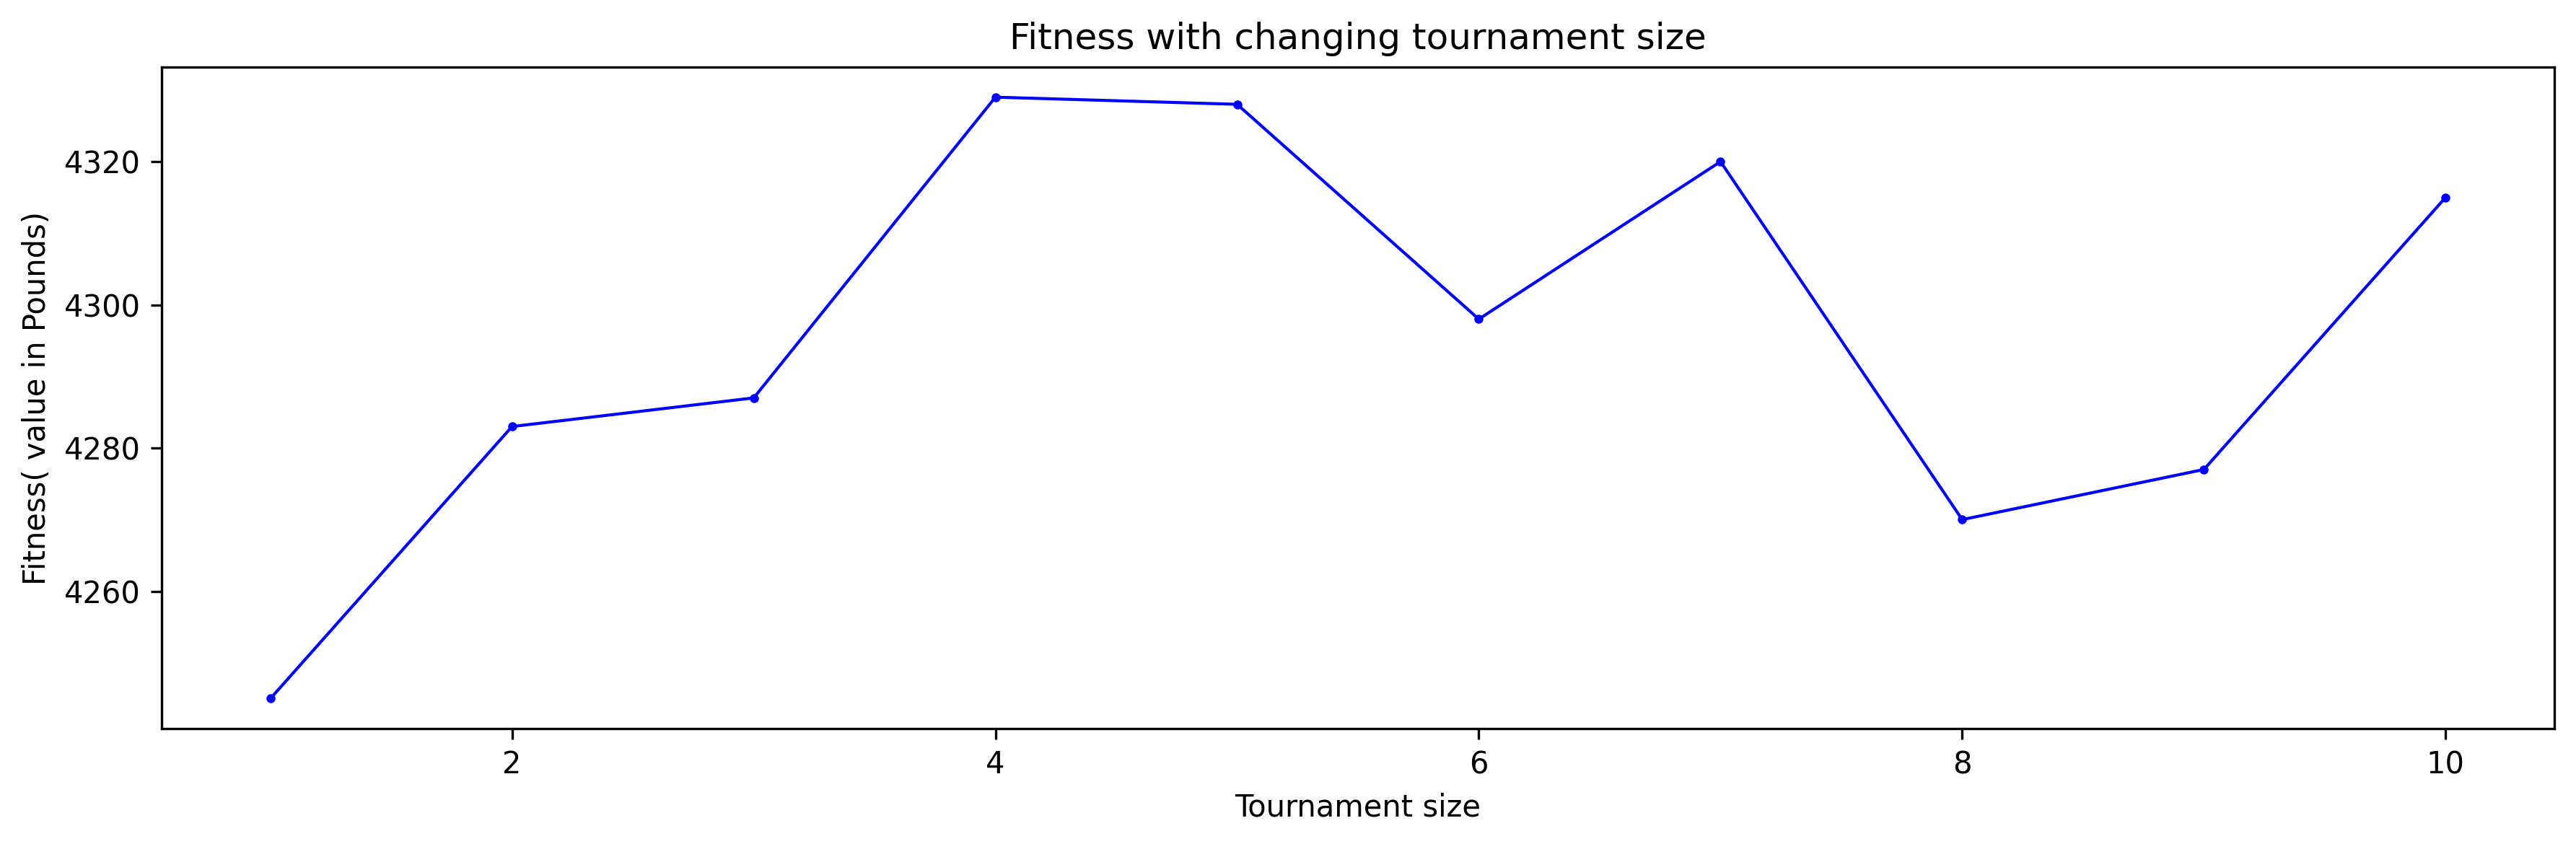

In [ ]:

population_size = 10
mutation_rate=1
length = 62 # length of chromosome
x = {'weight':[],'fitness': []}
for tournament_size in range(1, population_size+1):
  trials = 5
  trial_max_fitness = run_EA_for_n_trials(tournament_size, population_size, mutation_rate, weights, values, trials,  length)
  x['fitness'].append(trial_max_fitness[0])
  x['weight'].append(trial_max_fitness[1])
print(pd.DataFrame(x,index=range(1, population_size+1)))

# Plottig the results from above experiment.

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,4), dpi =300)
axes.plot(range(1, population_size+1), x['fitness'], color='b', marker='o', markersize=2, lw=1)
axes.set_xlabel('Tournament size')
axes.set_ylabel('Fitness( value in Pounds)')
axes.set_title('Fitness with changing tournament size')
fig.tight_layout()
plt.show()

#Experiment to assess the performance of EA with changing population size

    weight  fitness
1    276.3   4340.0
2    275.8   4366.0
3    273.7   4347.0
4    276.5   4340.0
5    276.3   4343.0
6    276.6   4340.0
7    273.5   4307.0
8    276.3   4283.0
9    276.8   4287.0
10   275.9   4329.0
11   276.6   4312.0
12   275.0   4273.0
13   276.5   4257.0
14   274.5   4195.0
15   276.3   4213.0
16   273.6   4196.0
17   277.0   4221.0
18   275.4   4166.0
19   276.7   4115.0
20   276.9   4190.0
21   272.8   4154.0
22   276.3   4155.0
23   275.4   4109.0
24   272.1   4104.0
25   276.4   4096.0
26   276.1   4058.0
27   274.2   4112.0
28   275.8   4029.0
29   275.5   4005.0


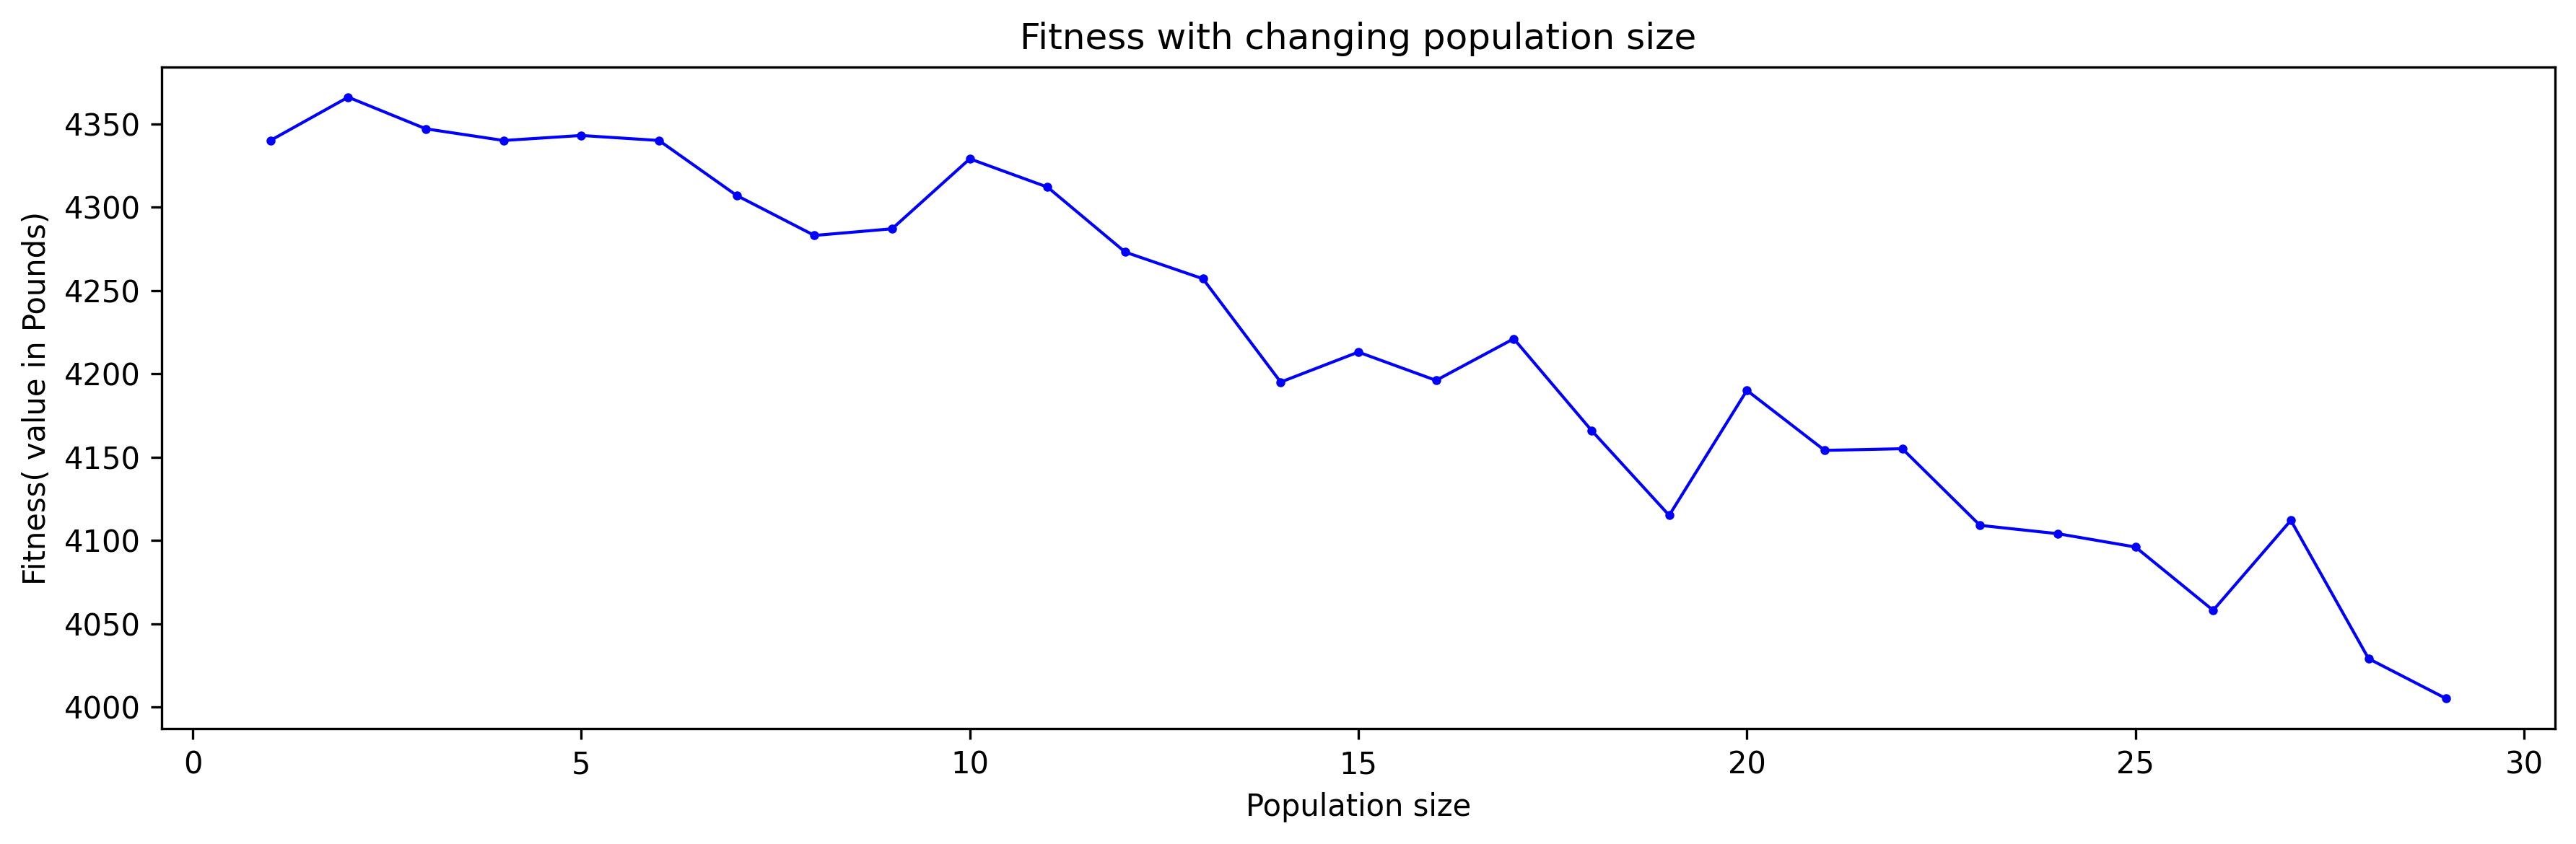

In [ ]:

tournament_size = 4
mutation_rate=1
length = 62 # length of chromosome
x = {'weight': [], 'fitness': []}
for population_size in range(1, 30):
  trials = 5
  trial_max_fitness = run_EA_for_n_trials(tournament_size, population_size, mutation_rate, weights, values, trials, length)
  x['fitness'].append(trial_max_fitness[0])
  x['weight'].append(trial_max_fitness[1])
print(pd.DataFrame(x,index=range(1, 30)))


# Plottig the results from above experiment.

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,4), dpi =300)
axes.plot(range(1, 30), x['fitness'], color='b', marker='o', markersize=2, lw=1)
axes.set_xlabel('Population size')
axes.set_ylabel('Fitness( value in Pounds)')
axes.set_title('Fitness with changing population size')
fig.tight_layout()
plt.show()

# Experiment to assess the performance of EA with changing mutation rate

    weight  fitness
1    276.8   4366.0
2    272.6   4291.0
3    276.1   4177.0
4    275.5   4146.0
5    273.1   4075.0
6    266.2   4023.0
7    274.6   3993.0
8    272.2   3966.0
9    276.6   3897.0
10   276.4   3863.0
11   271.7   3811.0
12   275.7   3738.0
13   276.4   3829.0
14   277.0   3769.0
15   276.5   3671.0
16   269.4   3576.0
17   271.2   3746.0
18   276.1   3619.0
19   269.5   3537.0
20   269.5   3537.0
21   269.5   3537.0
22   269.5   3537.0
23   269.5   3537.0
24   269.5   3537.0
25   269.5   3537.0
26   269.5   3537.0
27   269.5   3537.0
28   269.5   3537.0
29   269.5   3537.0


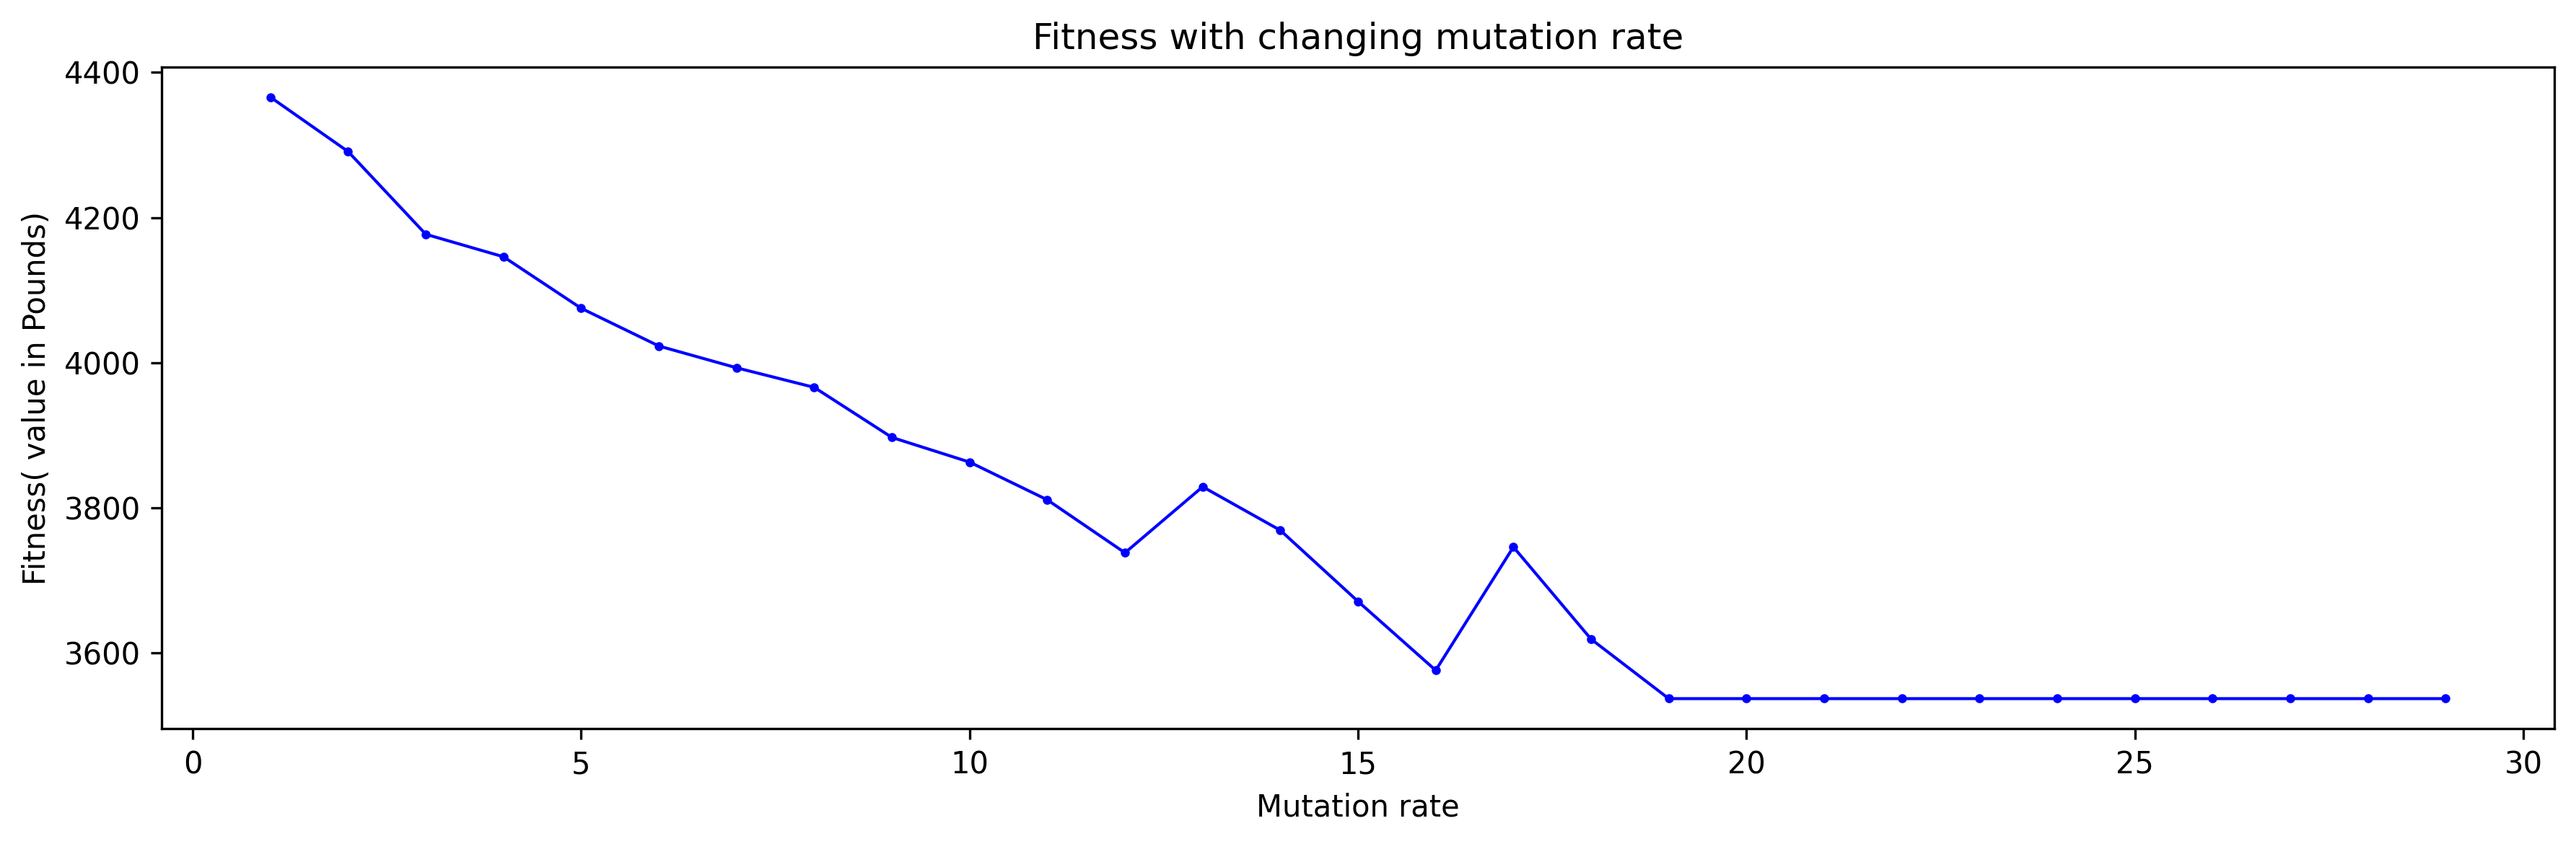

In [ ]:
tournament_size = 2
population_size=3
length = 60 # length of chromosome
x = {'weight':[], 'fitness':[]}
for mutation_rate in range(1, 30):
  trials = 5
  trial_max_fitness = run_EA_for_n_trials(tournament_size, population_size, mutation_rate, weights, values, trials, length)
  x['fitness'].append(trial_max_fitness[0])
  x['weight'].append(trial_max_fitness[1])
print(pd.DataFrame(x,index=range(1, 30)))

# Plottig the results from above experiment.
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,4), dpi =300)
axes.plot(range(1, 30), x['fitness'], color='b', marker='o', markersize=2, lw=1)
axes.set_xlabel('Mutation rate')
axes.set_ylabel('Fitness( value in Pounds)')
axes.set_title('Fitness with changing mutation rate')
fig.tight_layout()
plt.show()

# Best Solutions

# Best solution1: The best solution is obtained with following parameter values:
population_size = 3, 
tournament_size = 2, 
mutation_rate=1, 
length of chromosome(solution)= 62

In [ ]:
%%time
# Best solution
population_size = 3
tournament_size = 2
mutation_rate=1
length = 62 # length of chromosome
trials = 5
f = run_EA_for_n_trials(tournament_size, population_size, mutation_rate, weights, values, trials, length)
print('Fitness score (in Pounds): ',f[0])
print('weight of solution: ',f[1])

Fitness score (in Pounds):  4372.0
weight of solution:  276.79999999999995
CPU times: user 46.4 s, sys: 144 ms, total: 46.5 s
Wall time: 46.4 s


# Best solution2: Another best solution is obtained with following parameter values:
population_size = 3, 
tournament_size = 2, 
mutation_rate=1, 
length of chromosome(solution)= 63. 
However the computation time has increased significantly.

In [ ]:
%%time
# Best solution
population_size = 3
tournament_size = 2
mutation_rate=1
length = 63 # length of chromosome
trials = 5
f = run_EA_for_n_trials(tournament_size, population_size, mutation_rate, weights, values, trials, length)
print('Fitness score (in Pounds): ',f[0])
print('weight of solution: ',f[1])

Fitness score (in Pounds):  4376.0
weight of solution:  276.9
CPU times: user 6min 48s, sys: 1.42 s, total: 6min 50s
Wall time: 6min 48s


# Experiment to assess the performance of EA with variation in chromosome size
# i.e. number of bags in a solution

    weight  fitness
40   203.9   3400.0
41   212.9   3463.0
42   219.5   3525.0
43   224.2   3588.0
44   231.3   3647.0
45   231.6   3707.0
46   240.5   3766.0
47   246.4   3825.0
48   246.1   3882.0
49   259.9   3940.0
50   271.4   3997.0
51   271.3   4056.0
52   272.8   4109.0
53   276.3   4166.0
54   275.9   4211.0
55   276.5   4246.0
56   274.8   4273.0
57   274.0   4301.0
58   276.2   4319.0
59   276.7   4334.0
60   276.8   4366.0
61   276.1   4348.0
62   276.8   4372.0


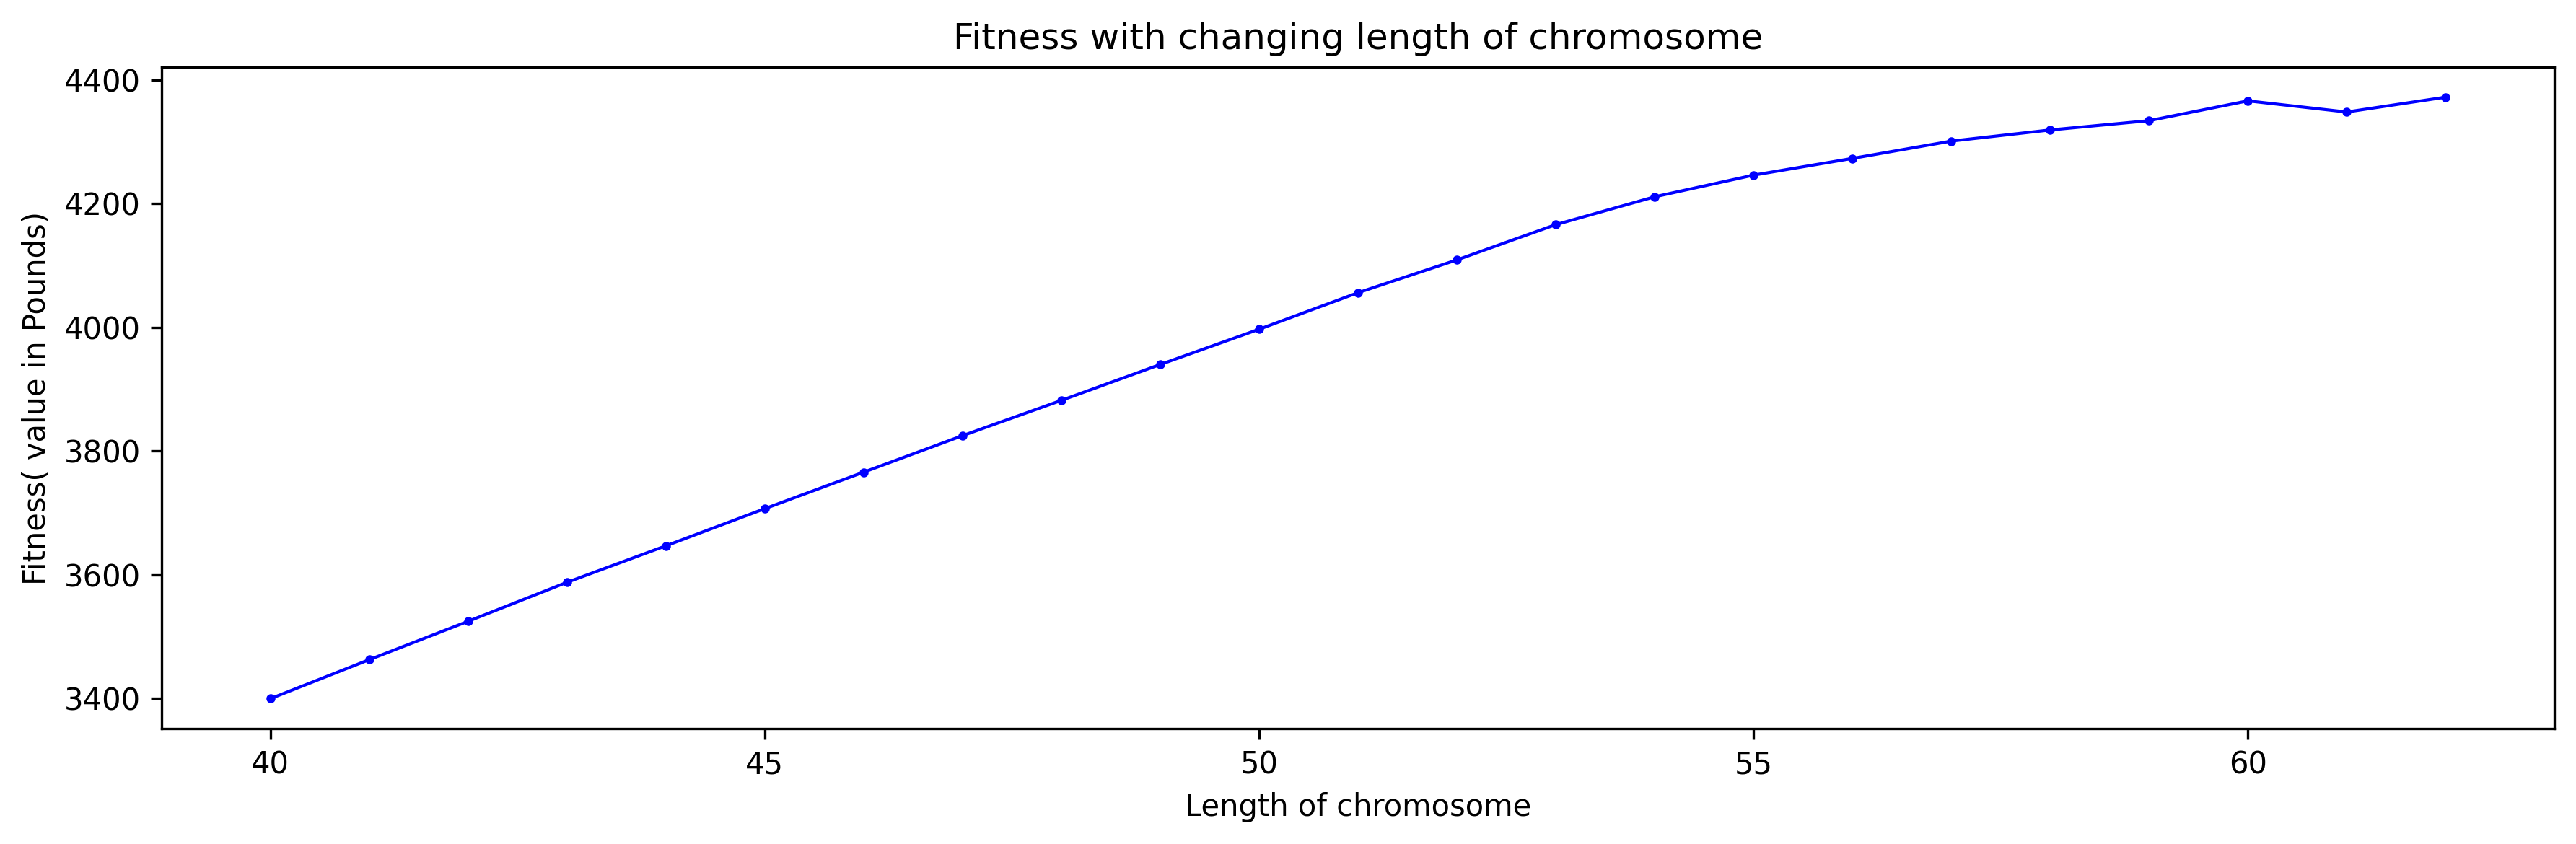

In [ ]:
# Changing the length of chromosome
tournament_size = 2
population_size=3
mutation_rate = 1
x = {'weight':[], 'fitness': []}
for length in range(40, 63):
  trials = 5
  trial_max_fitness = run_EA_for_n_trials(tournament_size, population_size, mutation_rate, weights, values, trials, length)
  x['fitness'].append(trial_max_fitness[0])
  x['weight'].append(trial_max_fitness[1])
print(pd.DataFrame(x,index=range(40, 63)))

# Plottig the results from above experiment.
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,4), dpi =300)
axes.plot(range(40, 63), x['fitness'], color='b', marker='o', markersize=2, lw=1)
axes.set_xlabel('Length of chromosome')
axes.set_ylabel('Fitness( value in Pounds)')
axes.set_title('Fitness with changing length of chromosome')
fig.tight_layout()
plt.show()

# Experiment to assess the performance of EA when mutation is removed

    weight  fitness
1    277.0   3640.0
2    277.0   3640.0
3    270.9   3659.0
4    277.0   3640.0
5    277.0   3640.0
6    277.0   3640.0
7    277.0   3640.0
8    277.0   3640.0
9    277.0   3640.0
10   277.0   3640.0


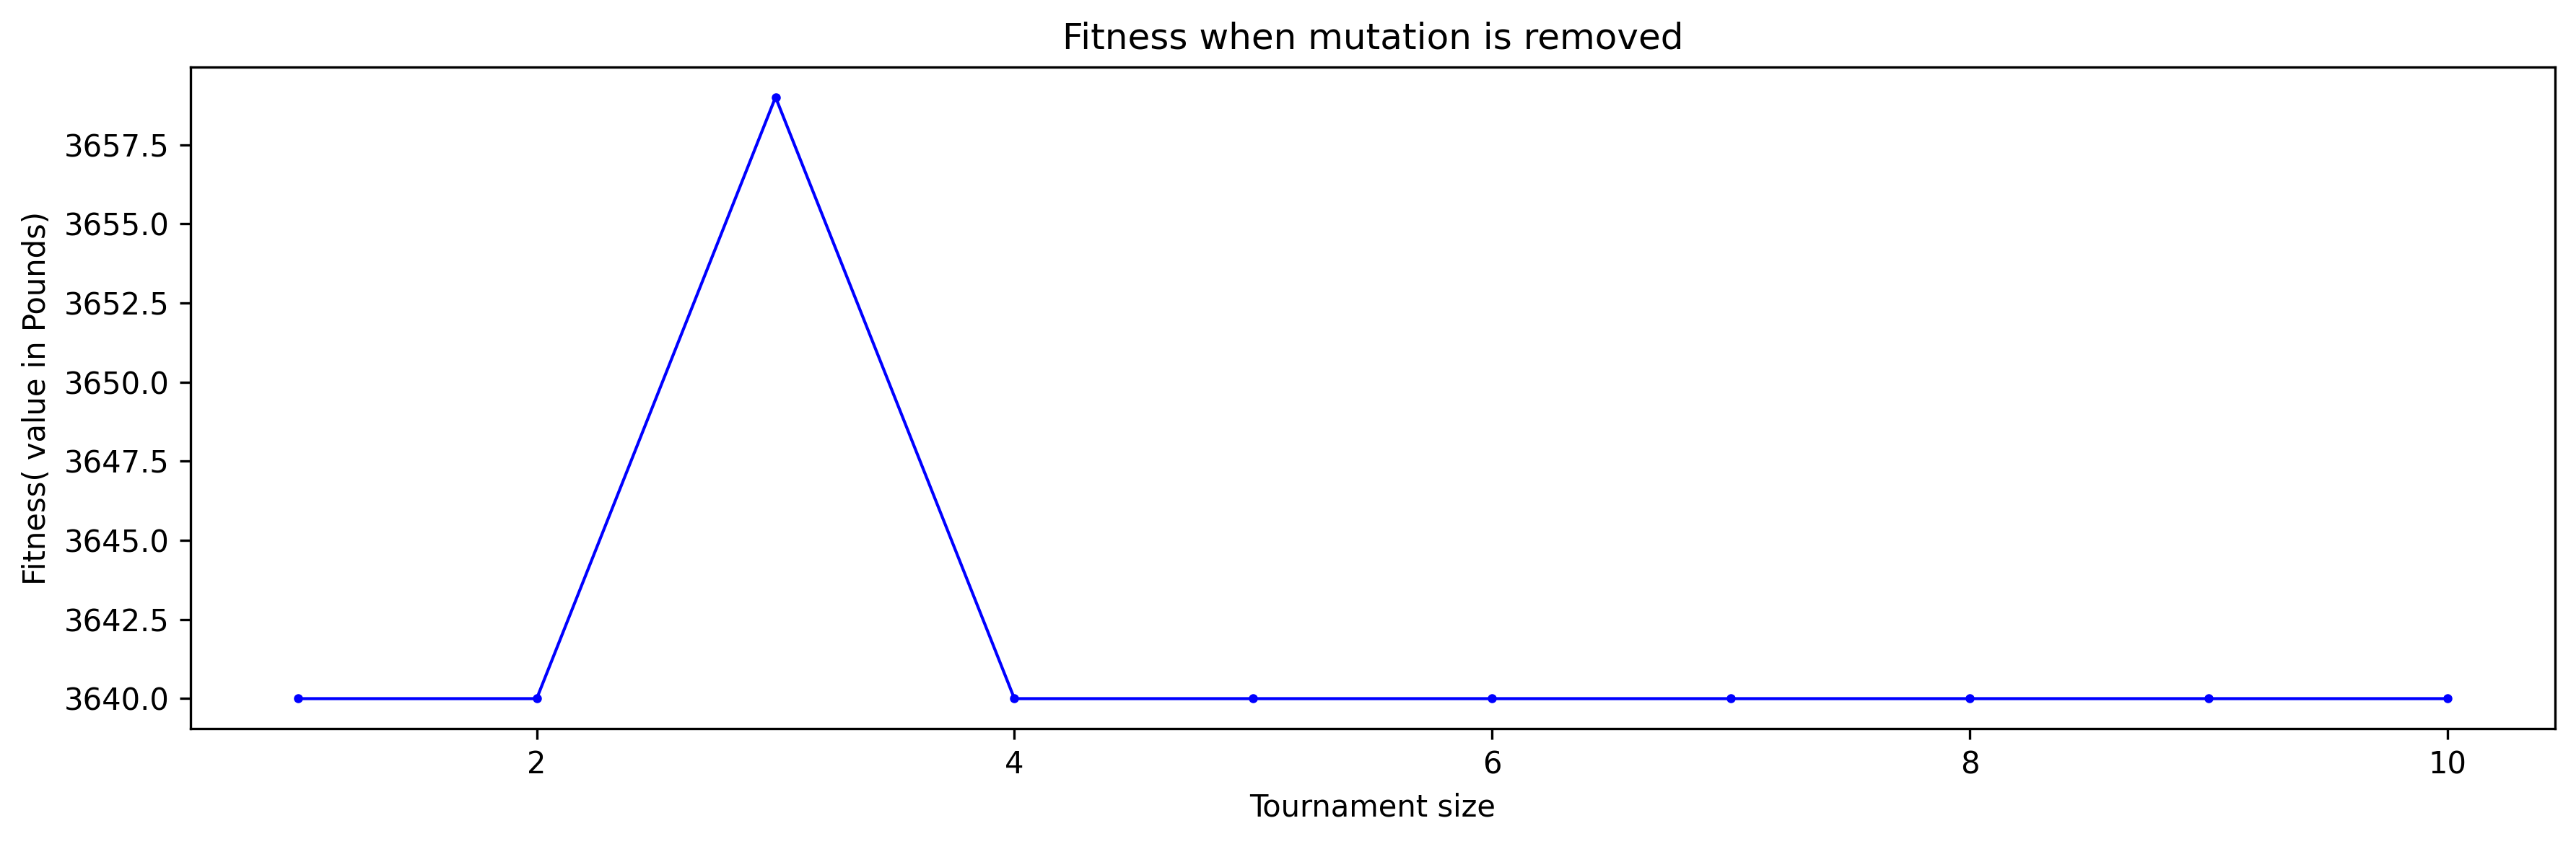

In [ ]:
# Removing the mutation, but keeping the crossover
population_size=10
mutation_rate = 0
length = 60 # length of chromosome
x = {'weight': [],'fitness': []}
for tournament_size in range(1, population_size+1):
  trials = 5
  trial_max_fitness = run_EA_for_n_trials(tournament_size, population_size, mutation_rate, weights, values, trials, length)
  x['fitness'].append(trial_max_fitness[0])
  x['weight'].append(trial_max_fitness[1])
print(pd.DataFrame(x,index=range(1, population_size+1)))

# Plottig the results from above experiment.
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,4), dpi =300)
axes.plot(range(1, population_size+1), x['fitness'], color='b', marker='o', markersize=2, lw=1)
axes.set_xlabel('Tournament size')
axes.set_ylabel('Fitness( value in Pounds)')
axes.set_title('Fitness when mutation is removed')
fig.tight_layout()
plt.show()

# Experiment to assess the performance of EA when mutation is performed but crossover is removed.

    weight  fitness
1    275.0   4231.0
2    275.5   4231.0
3    274.7   4238.0
4    275.3   4287.0
5    275.9   4272.0
6    276.7   4266.0
7    275.9   4313.0
8    275.1   4258.0
9    277.0   4286.0
10   275.9   4250.0


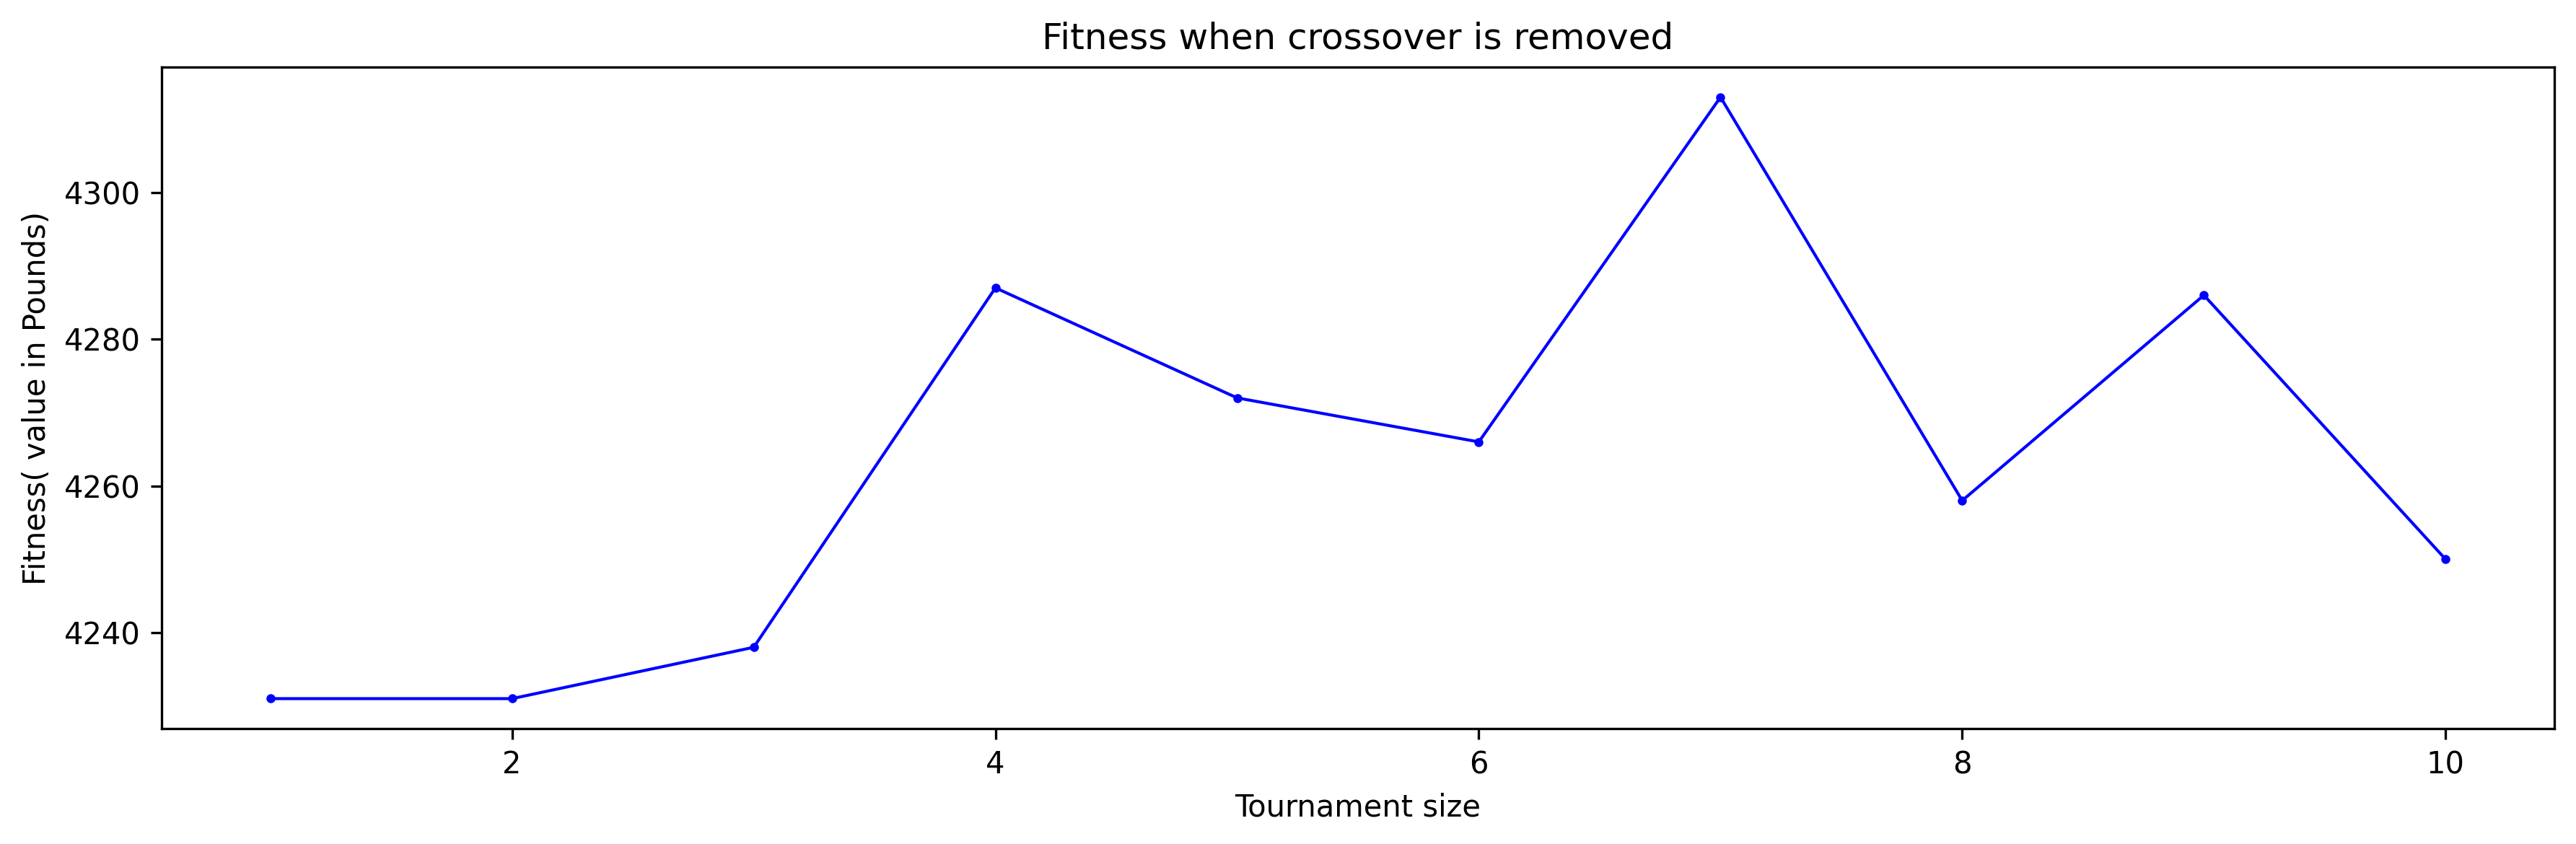

In [ ]:
# Keeping the mutation, but removing the crossover
population_size=10
mutation_rate = 1
length = 60 # length of chromosome
x = {'weight': [], 'fitness': []}
for tournament_size in range(1, population_size+1):
  trials = 5
  trial_max_fitness = run_EA_for_n_trials(tournament_size, population_size, mutation_rate, weights, values, trials, length, crossover=False)
  x['fitness'].append(trial_max_fitness[0])
  x['weight'].append(trial_max_fitness[1])
print(pd.DataFrame(x,index=range(1, population_size+1)))

# Plottig the results from above experiment.
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,4), dpi =300)
axes.plot(range(1, population_size+1), x['fitness'], color='b', marker='o', markersize=2, lw=1)
axes.set_xlabel('Tournament size')
axes.set_ylabel('Fitness( value in Pounds)')
axes.set_title('Fitness when crossover is removed')
fig.tight_layout()
plt.show()

# An analysis of Data

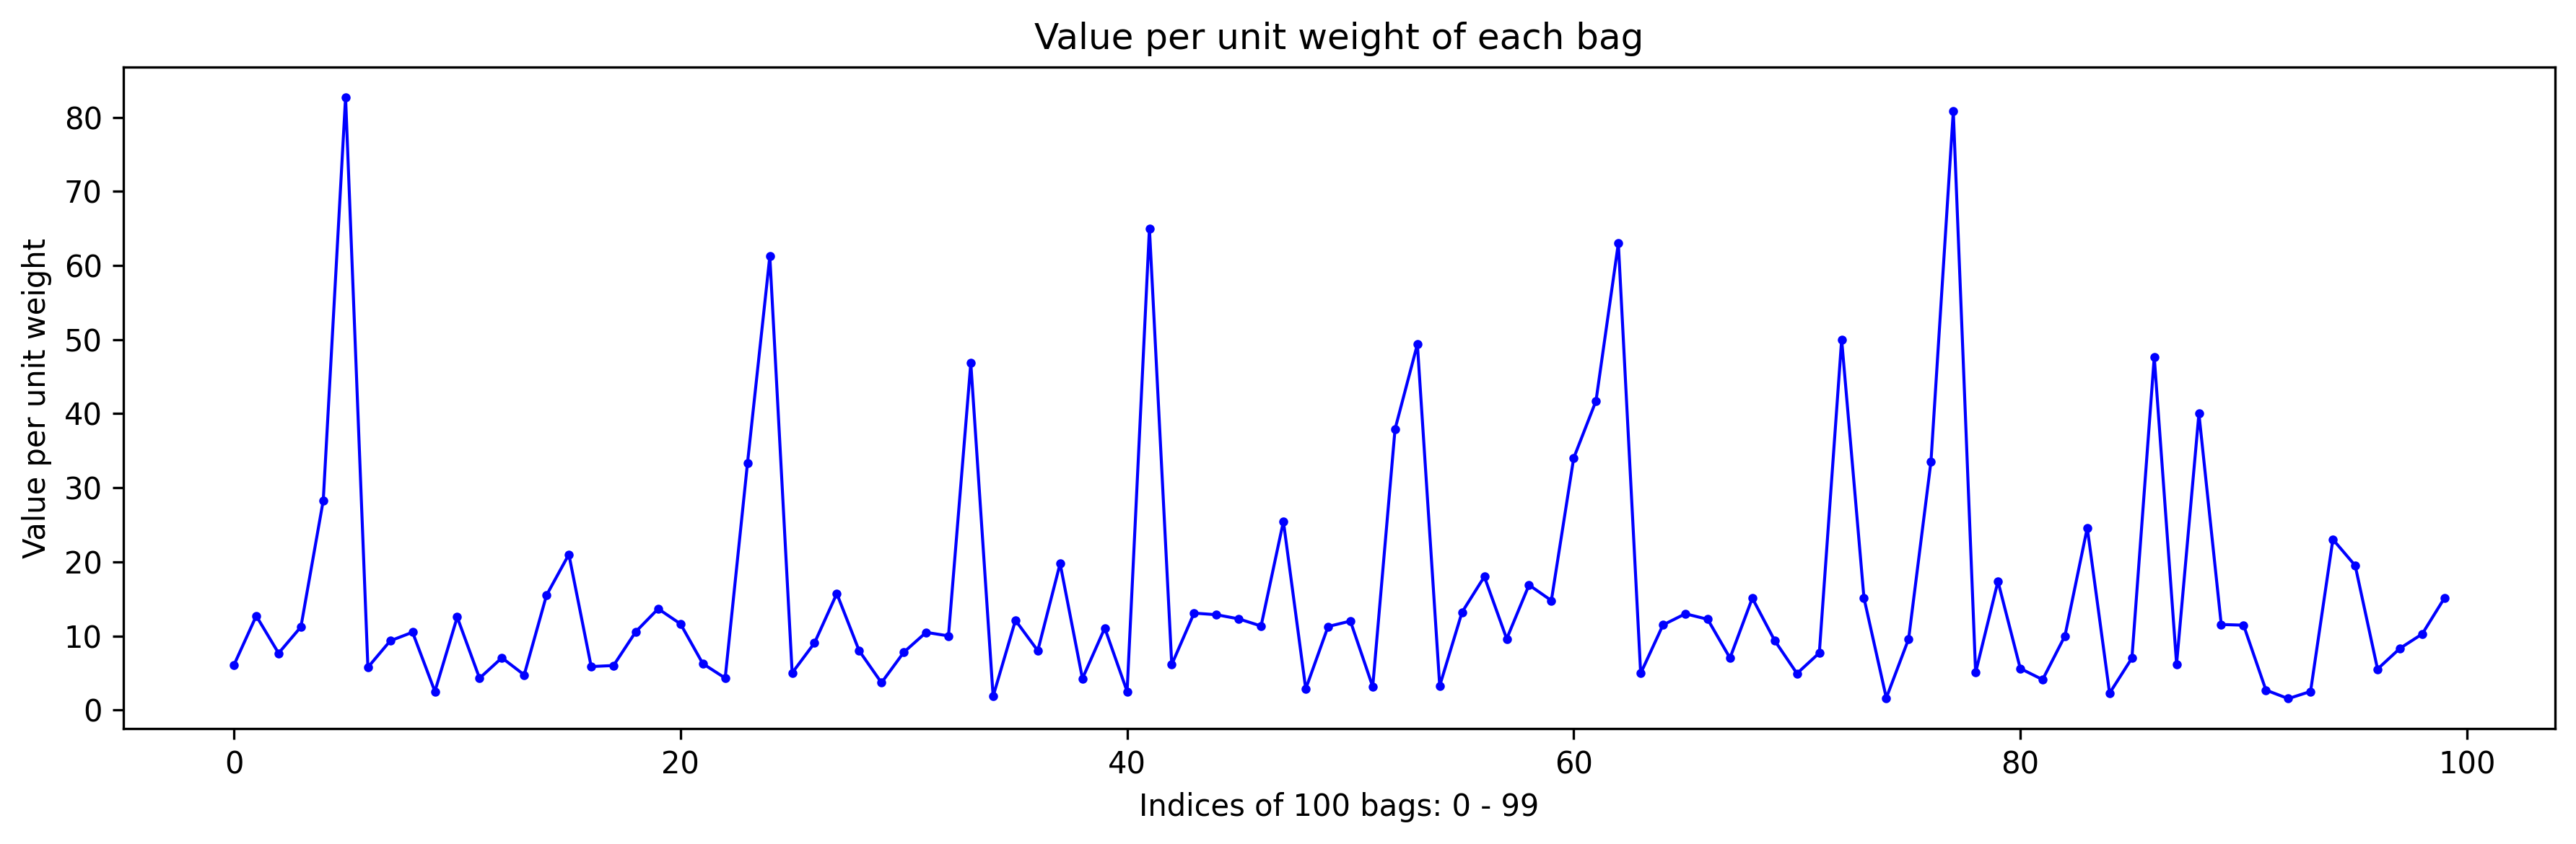

In [ ]:
abc = values/weights

# Plottig
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,4), dpi =300)
axes.plot(range(len(values)), abc, color='b', marker='o', markersize=2, lw=1)
axes.set_xlabel('Indices of 100 bags: 0 - 99')
axes.set_ylabel('Value per unit weight')
axes.set_title('Value per unit weight of each bag')
fig.tight_layout()
plt.show()


In [ ]:
# indices of the top 64 bags with highest value per unit weight
idx = (-values/weights).argsort()[:64]
print(idx)

In [ ]:
# Total money value from 64 bags
np.sum(values[idx])

4386.0

In [ ]:
# Sum weight of 64 bags
np.sum(weights[idx])

275.6